In [1]:
path = 'Canada.xlsx'

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
df_can = pd.read_excel(path, sheet_name='Canada by Citizenship', skiprows=20, skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_can.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV'], axis=1, inplace=True)

In [8]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Countient', 'RegName':'Region'}, inplace=True)
df_can.head()

,Country,Countient,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [9]:
all(isinstance(column, str) for column in df_can.columns)

False

In [12]:
df_can.columns = df_can.columns.map(str)
all(isinstance(column, str) for column in df_can.columns)

True

In [13]:
df_can.set_index('Country', inplace=True)
df_can.index.name=None
df_can.head()

,Countient,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [14]:
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

,Countient,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [17]:
years = list(map(str, range(1980,2014)))

In [18]:
df_can.sort_values(['Total'], ascending=False, inplace=True)
df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()
df_top5.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [19]:
df_top5.index

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [20]:
df_top5.index = df_top5.index.map(int)

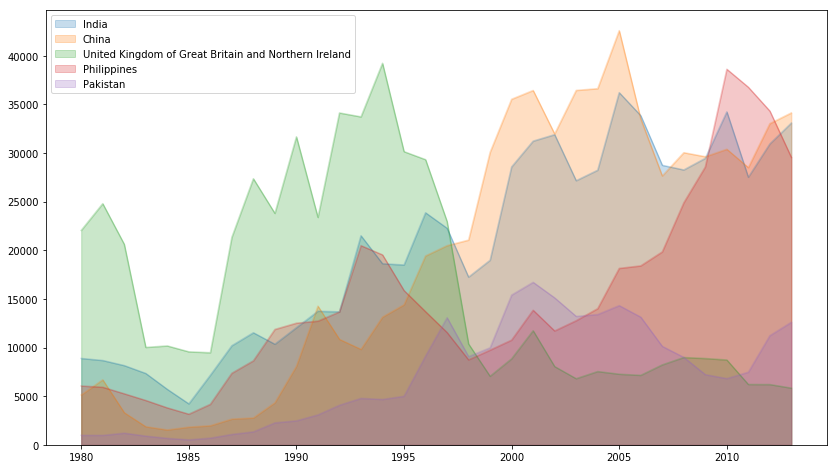

In [27]:
df_top5.plot(kind='area',
            stacked=False,
            alpha=0.25,
            figsize=(14,8))

Text(1980, 42000, '1980 num')

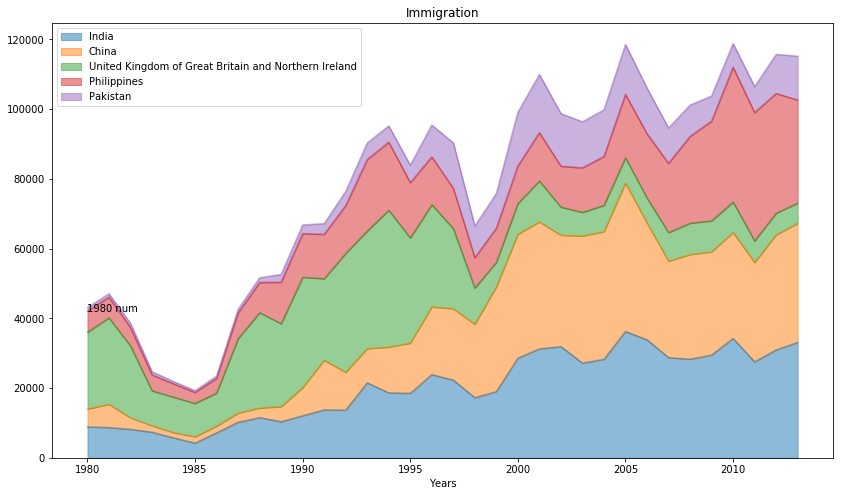

In [25]:
ax = df_top5.plot(kind='area', alpha=0.5, figsize=(14,8))
ax.set_title('Immigration')
ax.set_xlabel('Years')
ax.text(1980,42000,'1980 num')

In [28]:
import numpy as np

In [29]:
df_C = df_can.loc['China', years]

In [30]:
df_C.transpose()
df_C.head()

1980    5123
1981    6682
1982    3308
1983    1863
1984    1527
Name: China, dtype: object

In [32]:
df_C.index = df_C.index.map(int)

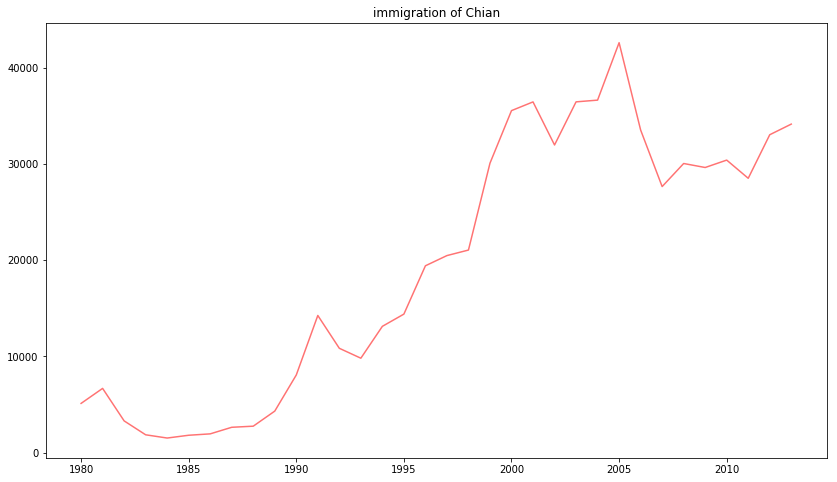

In [33]:
df_C.plot(kind='line', alpha=0.55, color='r', title='immigration of Chian', figsize=(14, 8))

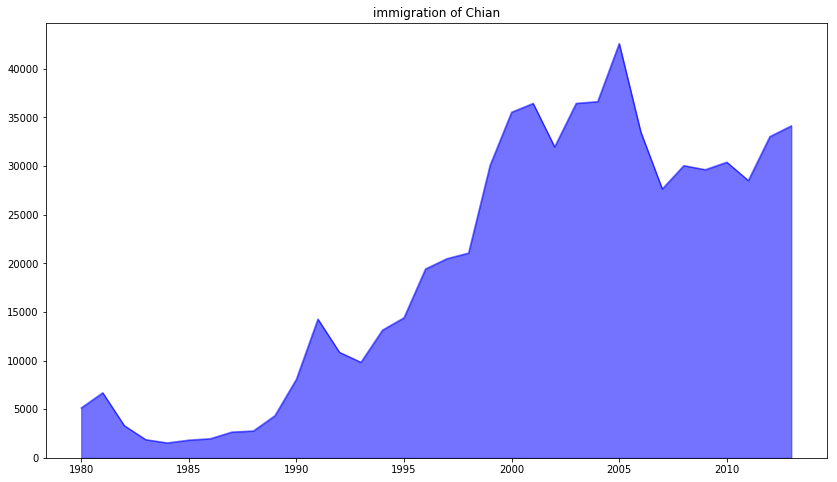

In [34]:
df_C.plot(kind='area', stacked=True, alpha=0.55, color='blue', title='immigration of Chian', figsize=(14, 8))